In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

# Life Expectancy
Data Cleansing

In [2]:
df_le = pd.read_csv("research/LifeExpectancy.csv")

In [3]:
df_le.head()

,Country; Year,Life expectancy at birth (years); Both sexes,Life expectancy at birth (years); Female,Life expectancy at birth (years); Male,Life expectancy at age 60 (years); Both sexes,Life expectancy at age 60 (years); Female,Life expectancy at age 60 (years); Male,Healthy life expectancy (HALE) at birth (years); Both sexes,Healthy life expectancy (HALE) at birth (years); Female,Healthy life expectancy (HALE) at birth (years); Male
0,Afghanistan; 2013,61,62,61,16,17,15,50,50,50
1,Afghanistan; 2012,60,61,58,16,17,15,49,49,49
2,Afghanistan; 2000,55,56,54,15,16,14,45,45,45
3,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN
4,Albania; 2013,74,76,73,19,20,18,65,66,64


In [4]:
# Updating column names so easier to work with.
df_le = pd.read_csv('research/LifeExpectancy.csv', names=("Country; Year", "LEatBirth", "LEatBirthFem", "LEatBirthMale",
                                                                      "LEat60", "LEat60Female", "LEat60Male", "HALEatBirth",
                                                                      "HALEatBirthFemale", "HALEatBirthMale"))[1:]

In [5]:
df_le.head()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale
1,Afghanistan; 2013,61,62,61,16,17,15,50,50,50
2,Afghanistan; 2012,60,61,58,16,17,15,49,49,49
3,Afghanistan; 2000,55,56,54,15,16,14,45,45,45
4,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN
5,Albania; 2013,74,76,73,19,20,18,65,66,64


In [6]:
# separating country from year in initial cell to 2 separate cells
df_le['Country'], df_le['Year'] = zip(*df_le['Country; Year'].apply(lambda x: x.split('; ', 1)))

In [7]:
df_le.head()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale,Country,Year
1,Afghanistan; 2013,61,62,61,16,17,15,50,50,50,Afghanistan,2013
2,Afghanistan; 2012,60,61,58,16,17,15,49,49,49,Afghanistan,2012
3,Afghanistan; 2000,55,56,54,15,16,14,45,45,45,Afghanistan,2000
4,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN,Afghanistan,1990
5,Albania; 2013,74,76,73,19,20,18,65,66,64,Albania,2013


In [8]:
df_le.describe()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale,Country,Year
count,776,776,776,776,776,776,776,582,582,582,776,776
unique,776,46,48,46,16,19,15,44,46,44,194,4
top,Lebanon; 2000,74,78,72,17,18,16,63,66,63,South Africa,2000
freq,1,51,65,51,118,95,125,40,51,42,4,194


In [9]:
df_le['HALEatBirth'].dtype

dtype('O')

In [10]:
# clearly we have cleanliness issues, so going to clean and put into a new dataset

In [11]:
df_le['Country'].value_counts()

South Africa                                 4
Swaziland                                    4
Guyana                                       4
Croatia                                      4
El Salvador                                  4
Egypt                                        4
Slovenia                                     4
Viet Nam                                     4
Fiji                                         4
Cameroon                                     4
Brazil                                       4
Solomon Islands                              4
Costa Rica                                   4
Cuba                                         4
Bulgaria                                     4
Botswana                                     4
Czech Republic                               4
Nigeria                                      4
Slovakia                                     4
Montenegro                                   4
Central African Republic                     4
Tajikistan   

In [12]:
df_le['Year'].value_counts()

2000    194
1990    194
2013    194
2012    194
Name: Year, dtype: int64

In [13]:
#convert year into date format
df_le['Year'] = pd.to_datetime(df_le['Year'], format='%Y')

In [14]:
df_le.head()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale,Country,Year
1,Afghanistan; 2013,61,62,61,16,17,15,50,50,50,Afghanistan,2013-01-01
2,Afghanistan; 2012,60,61,58,16,17,15,49,49,49,Afghanistan,2012-01-01
3,Afghanistan; 2000,55,56,54,15,16,14,45,45,45,Afghanistan,2000-01-01
4,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN,Afghanistan,1990-01-01
5,Albania; 2013,74,76,73,19,20,18,65,66,64,Albania,2013-01-01


In [15]:
# function to use on number fields that contain multiple answers, in order to update number fields appropriately
# data is at year level, so ints can be used (vs floats)
def clean_le(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return int(value[0:2])

In [119]:
#used to convert to float, but check for NaN values first
def clean_float(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return float(value)

In [16]:
#check
clean_le('46 48')

46

In [17]:
df_le['HALEatBirth'].head()

1     50
2     49
3     45
4    NaN
5     65
Name: HALEatBirth, dtype: object

In [18]:
df_le['HALEatBirth'] = df_le['HALEatBirth'].apply(clean_le)

In [19]:
df_le['HALEatBirth'].value_counts()

63    40
65    39
62    36
64    33
66    32
60    26
67    25
69    22
61    22
72    21
68    21
71    20
70    18
50    18
54    16
59    15
53    14
57    14
58    13
49    12
55    12
51    11
73    10
44    10
56     9
52     8
43     8
41     8
48     7
46     7
45     7
47     6
39     5
42     4
40     2
38     2
76     2
75     2
74     2
37     1
36     1
33     1
Name: HALEatBirth, dtype: int64

In [20]:
# confirm float, as we have NaN and ints
df_le['HALEatBirth'].dtype

dtype('float64')

In [21]:
# confirm NaN are maintained
df_le['HALEatBirth'].head()

1    50
2    49
3    45
4   NaN
5    65
Name: HALEatBirth, dtype: float64

In [ ]:
# no longer necessary
# keeping as a reference
# df_le['HALEatBirth'] = df_le['HALEatBirth'].astype('float')

In [22]:
# repeat above process for LEatBirth and LEat60
df_le['LEatBirth'] = df_le['LEatBirth'].apply(clean_le)
df_le['LEat60'] = df_le['LEat60'].apply(clean_le)

In [24]:
#confirm type: int will work
df_le.dtypes

Country; Year                object
LEatBirth                     int64
LEatBirthFem                 object
LEatBirthMale                object
LEat60                        int64
LEat60Female                 object
LEat60Male                   object
HALEatBirth                 float64
HALEatBirthFemale            object
HALEatBirthMale              object
Country                      object
Year                 datetime64[ns]
dtype: object

In [28]:
# create a smaller df with fields of interest
df_le_clean = pd.DataFrame({'Country': df_le.Country, 'Year': df_le.Year, "LEatBirth": df_le.LEatBirth, 
                            "LEat60": df_le.LEat60, "HALEatBirth": df_le.HALEatBirth})
df_le_clean.head()

,Country,HALEatBirth,LEat60,LEatBirth,Year
1,Afghanistan,50,16,61,2013-01-01
2,Afghanistan,49,16,60,2012-01-01
3,Afghanistan,45,15,55,2000-01-01
4,Afghanistan,NaN,14,49,1990-01-01
5,Albania,65,19,74,2013-01-01


In [29]:
# confirm datatypes are what we need
df_le_clean.dtypes

Country                object
HALEatBirth           float64
LEat60                  int64
LEatBirth               int64
Year           datetime64[ns]
dtype: object

# Life Expectancy
Initial Analysis

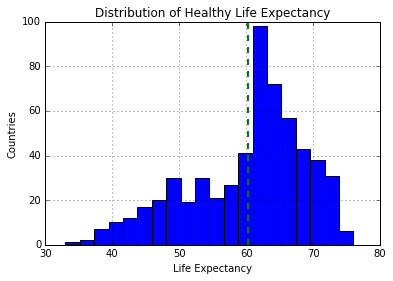

In [37]:
#historgram of HALE
df_le_clean.hist('HALEatBirth', bins = 20)
pyplot.ylabel("Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Healthy Life Expectancy")
pyplot.axvline(df_le_clean['HALEatBirth'].mean(), color='g', linestyle='dashed', linewidth=2)


In [44]:
# of countries
len(df_le_clean.Country.unique())

194

In [45]:
le_by_country = df_le_clean.groupby('Country')

In [46]:
le_by_country.describe()

HALEatBirth     LEat60  LEatBirth
Country                                             
Afghanistan count     3.000000   4.000000   4.000000
            mean     48.000000  15.250000  56.250000
            std       2.645751   0.957427   5.500000
            min      45.000000  14.000000  49.000000
            25%      47.000000  14.750000  53.500000
            50%      49.000000  15.500000  57.500000
            75%      49.500000  16.000000  60.250000
            max      50.000000  16.000000  61.000000
Albania     count     3.000000   4.000000   4.000000
            mean     64.000000  17.750000  71.750000
            std       1.732051   1.500000   2.629956
            min      62.000000  16.000000  69.000000
            25%      63.500000  16.750000  69.750000
            50%      65.000000  18.000000  72.000000
            75%      65.000000  19.000000  74.000000
            max      65.000000  19.000000  74.000000
Algeria     count     3.000000   4.000000   4.000000
            mean     61.333333  17.750000  70.500000
            std       1.154701   0.500000   1.914854
            min      60.000000  17.000000  68.000000
            25%      61.000000  17.750000  69.500000
            50%      62.000000  18.000000  71.000000
            75%      62.000000  18.000000  72.000000
            max      62.000000  18.000000  72.000000
Andorra     count     3.000000   4.000000   4.000000
            mean     71.000000  23.750000  80.750000
            std       1.732051   1.500000   2.872281
            min      69.000000  22.000000  77.000000
            25%      70.500000  22.750000  79.250000
            50%      72.000000  24.000000  81.500000
...                        ...        ...        ...
Viet Nam    std       1.732051   0.957427   2.872281
            min      63.000000  20.000000  70.000000
            25%      64.500000  20.750000  72.250000
            50%      66.000000  21.500000  74.500000
            75%      66.000000  22.000000  76.000000
            max      66.000000  22.000000  76.000000
Yemen       count     3.000000   4.000000   4.000000
            mean     53.333333  16.000000  61.750000
            std       2.081666   0.000000   2.872281
            min      51.000000  16.000000  58.000000
            25%      52.500000  16.000000  60.250000
            50%      54.000000  16.000000  62.500000
            75%      54.500000  16.000000  64.000000
            max      55.000000  16.000000  64.000000
Zambia      count     3.000000   4.000000   4.000000
            mean     45.000000  16.000000  49.750000
            std       7.810250   1.154701   8.995369
            min      36.000000  15.000000  41.000000
            25%      42.500000  15.000000  42.500000
            50%      49.000000  16.000000  50.000000
            75%      49.500000  17.000000  57.250000
            max      50.000000  17.000000  58.000000
Zimbabwe    count     3.000000   4.000000   4.000000
            mean     45.333333  17.500000  55.250000
            std       7.234178   1.000000   8.995369
            min      37.000000  16.000000  42.000000
            25%      43.000000  17.500000  54.000000
            50%      49.000000  18.000000  58.500000
            75%      49.500000  18.000000  59.750000
            max      50.000000  18.000000  62.000000

[1552 rows x 3 columns]

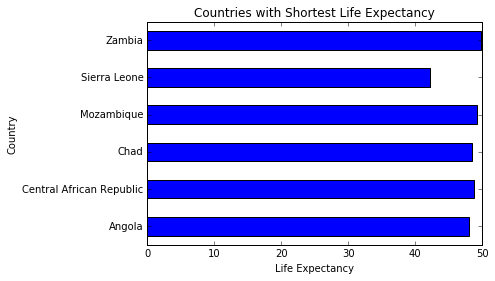

In [51]:
# countries with the lowest life expectancy
le_by_country['LEatBirth'].mean()[le_by_country['LEatBirth'].mean()<50].plot(kind='barh')
pyplot.xlabel("Life Expectancy")
pyplot.title("Countries with Shortest Life Expectancy")

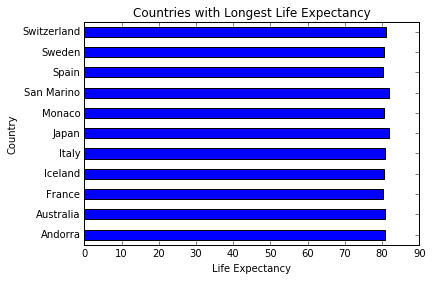

In [50]:
# countries with the highest life expectancy
le_by_country['LEatBirth'].mean()[le_by_country['LEatBirth'].mean()>80].plot(kind='barh')
pyplot.xlabel("Life Expectancy")
pyplot.title("Countries with Longest Life Expectancy")

In [70]:
# used to test difference calculation below
df_le_clean[df_le_clean.Country == 'Sierra Leone']

,Country,HALEatBirth,LEat60,LEatBirth,Year
613,Sierra Leone,39,13,46,2013-01-01
614,Sierra Leone,39,13,46,2012-01-01
615,Sierra Leone,33,11,39,2000-01-01
616,Sierra Leone,NaN,11,38,1990-01-01


In [81]:
# look at countries with largest difference b/t LEatBirth and LEat60 (using median values across years of data)
le_variance = abs(le_by_country['LEatBirth'].median() - (le_by_country['LEat60'].median() + 60)).sort_values(ascending=False)
le_variance.head(10)

Country
Sierra Leone                        29.5
Angola                              27.0
Zambia                              26.0
Central African Republic            26.0
Chad                                26.0
Lesotho                             26.0
Mozambique                          25.5
Nigeria                             25.0
Democratic Republic of the Congo    24.5
Somalia                             24.0
dtype: float64

In [84]:
# alt approach in order to graph LEatBirth, LEat60, and Difference on 1 plot
df_le_clean['LEDifference'] = abs(df_le_clean['LEatBirth'] - (df_le_clean['LEat60'] + 60))
le_by_country = df_le_clean.groupby('Country')

In [99]:
le_variance = df_le_clean[df_le_clean.LEDifference > 30]
le_variance

,Country,HALEatBirth,LEat60,LEatBirth,Year,LEDifference
20,Angola,NaN,14,43,1990-01-01,31
388,Liberia,NaN,14,42,1990-01-01,32
407,Malawi,38,15,44,2000-01-01,31
464,Mozambique,NaN,14,43,1990-01-01,31
496,Niger,NaN,15,43,1990-01-01,32
615,Sierra Leone,33,11,39,2000-01-01,32
616,Sierra Leone,NaN,11,38,1990-01-01,33
644,South Sudan,NaN,14,42,1990-01-01,32
771,Zambia,36,15,41,2000-01-01,34
772,Zambia,NaN,15,43,1990-01-01,32


Need to expand LE analysis here...

# Commitments & Dispursements
Data Cleansing

In [106]:
# import raw data, and again rename columns to make them easier to use
df_c = pd.read_csv("research/Commitments_n_DisbursementsofAidbyCountry.csv", names = ("Country; Year", "Commitments", "Disbursements"))[1:]

In [107]:
df_c.head()

,Country; Year,Commitments,Disbursements
1,Afghanistan; 2010,386.92,300.09
2,Afghanistan; 2009,254.04,345.59
3,Afghanistan; 2008,459.8,254.46
4,Afghanistan; 2007,217.22,254.4
5,Afghanistan; 2006,334.53,186.74


In [108]:
df_c.count()

Country; Year    1295
Commitments      1295
Disbursements    1295
dtype: int64

In [109]:
df_c.columns


Index(['Country; Year', 'Commitments', 'Disbursements'], dtype='object')

In [110]:
# separate country and year into their own columns
df_c['Country'], df_c['Year'] = zip(*df_c['Country; Year'].apply(lambda x: x.split('; ', 1)))

In [111]:
df_c.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', "Cote d'Ivoire",
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia',
       'Cuba', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Fiji', 'Gabon',
       'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia',


In [112]:
len(df_c.Country.unique())

119

In [113]:
df_c.dtypes

Country; Year    object
Commitments      object
Disbursements    object
Country          object
Year             object
dtype: object

In [114]:
df_c.Year.value_counts()

2008    119
2007    119
2005    119
2010    119
2009    119
2006    119
2004    117
2000    116
2002    116
2001    116
2003    116
Name: Year, dtype: int64

In [115]:
#convert year into date format
df_c['Year'] = pd.to_datetime(df_c['Year'], format='%Y')

In [116]:
df_c.dtypes

Country; Year            object
Commitments              object
Disbursements            object
Country                  object
Year             datetime64[ns]
dtype: object

In [121]:
#similar to LE, need to clean up Commitments & Dispursements to change to number fields
# cannot change directly to float, so need to clean using function written
# repeat above process for LEatBirth and LEat60
df_c['Commitments'] = df_c['Commitments'].apply(clean_float)
df_c['Disbursements'] = df_c['Disbursements'].apply(clean_float)

In [123]:
df_c.dtypes

Country; Year            object
Commitments             float64
Disbursements           float64
Country                  object
Year             datetime64[ns]
dtype: object

In [124]:
commitments_by_country = df_c.groupby('Country')

In [125]:
commitments_by_country.describe()

Commitments  Disbursements
Country                                      
Afghanistan count    11.000000      11.000000
            mean    202.500909     154.827273
            std     148.448272     122.432684
            min       7.910000       6.000000
            25%      89.970000      42.355000
            50%     178.730000     160.790000
            75%     294.285000     254.430000
            max     459.800000     345.590000
Albania     count    11.000000      11.000000
            mean     23.777273      20.459091
            std      13.460340       5.757750
            min       8.790000      12.690000
            25%      16.410000      15.650000
            50%      18.310000      22.780000
            75%      28.355000      23.590000
            max      58.290000      30.950000
Algeria     count    11.000000      11.000000
            mean      5.640909       3.446364
            std       6.376788       1.115950
            min       1.430000       1.030000
            25%       2.475000       3.065000
            50%       2.850000       3.510000
            75%       5.750000       4.155000
            max      23.580000       5.050000
Angola      count    11.000000      11.000000
            mean     83.455455      66.180909
            std      43.153513      27.618575
            min      39.670000      20.780000
            25%      50.580000      47.830000
            50%      70.600000      65.260000
...                        ...            ...
Viet Nam    std      95.650483      66.707983
            min      51.890000      64.650000
            25%     176.670000      96.600000
            50%     181.930000     139.830000
            75%     248.235000     183.795000
            max     402.130000     279.970000
Yemen       count    11.000000      11.000000
            mean     52.169091      37.998182
            std      26.802211      14.670756
            min      19.760000      17.930000
            25%      36.055000      24.635000
            50%      48.520000      41.230000
            75%      56.370000      46.860000
            max     118.190000      63.160000
Zambia      count    11.000000      11.000000
            mean    279.232727     210.233636
            std     136.452329     112.454957
            min     108.220000      26.680000
            25%     196.550000     129.795000
            50%     294.670000     224.850000
            75%     324.815000     286.290000
            max     593.990000     376.820000
Zimbabwe    count    11.000000      11.000000
            mean     95.682727      96.979091
            std      40.083605      65.223643
            min      51.170000      12.290000
            25%      68.610000      48.500000
            50%      84.720000     108.050000
            75%     114.120000     133.260000
            max     169.790000     229.190000

[952 rows x 2 columns]

In [126]:
commitments_by_country.mean()

,Commitments,Disbursements
Country,,
Afghanistan,202.500909,154.827273
Albania,23.777273,20.459091
Algeria,5.640909,3.446364
Angola,83.455455,66.180909
Argentina,21.648182,18.371818
Armenia,19.489091,17.068182
Azerbaijan,16.588182,10.827273
Bangladesh,221.431818,204.337273
Belarus,8.240000,9.078333


# Commitments & Dispursements
Initial Analysis

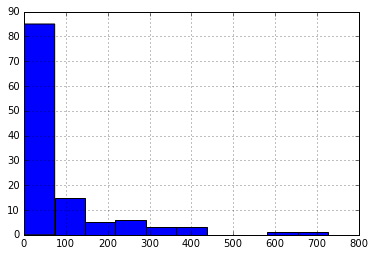

In [128]:
commitments_by_country['Commitments'].mean().hist()
#add mean

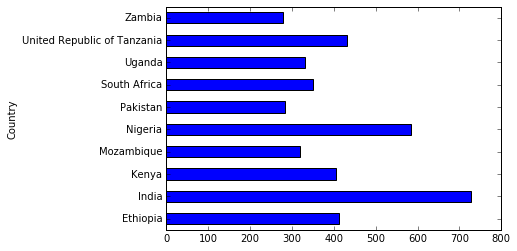

In [129]:
# look at those countries with the most committed to them
commitments_by_country['Commitments'].mean()[commitments_by_country['Commitments'].mean()>250].plot(kind='barh')

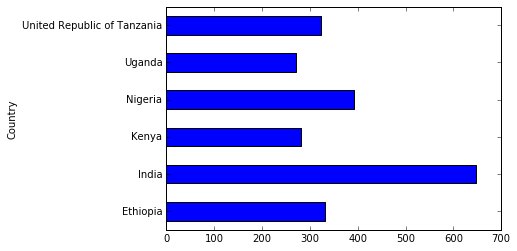

In [130]:
# look at those countries with the largest dispursements
commitments_by_country['Disbursements'].mean()[commitments_by_country['Disbursements'].mean()>250].plot(kind='barh')

In [ ]:
# Need to expand commitments analysis here...